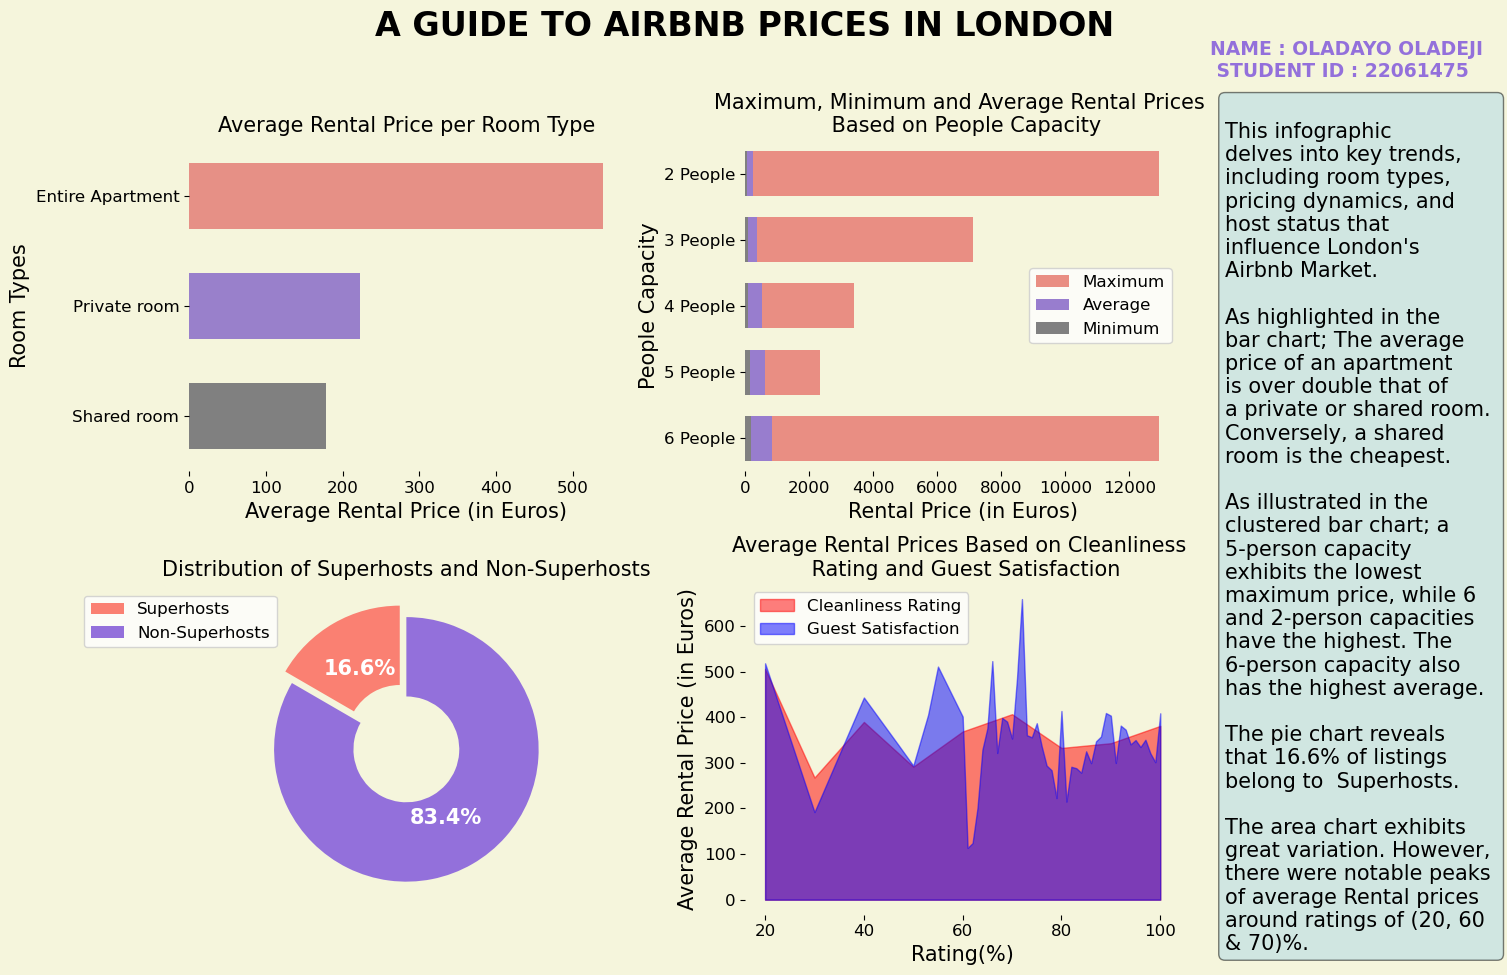

In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reading in the dataset
data = pd.read_csv('london-weekends.csv')

#dropping unnamed column
data.drop('Unnamed: 0', axis = 'columns', inplace = True)

#Summary Statistics
# Mean(Average) rental price of all airbnbs in EURO
Average_rental_price = np.mean(data['realSum'])

# Most Commonly rented room type
Typical_room_type = (data['room_type'].value_counts()).index[0]

# Mean(Average) people capacity of the airbnbs
Average_person_capacity = np.mean(data['person_capacity'])

# Mean(Average) cleanliness rating
Average_cleanliness_rating = np.mean(data['cleanliness_rating'])

# Range of Cleanliness Rating
Cleanliness_rating_range = np.ptp(data['cleanliness_rating'])

# Mean(Average) Guest Satisfaction rating
Average_guest_rating = np.mean(data['guest_satisfaction_overall'])

# Range of Guest Satisfaction Rating
Guest_rating_range = np.ptp(data['guest_satisfaction_overall'])

# Mean(Average) number of bedrooms across all airbnbs
Average_number_of_bedrooms = np.mean(data['bedrooms'])

# Mean(Average) distance of the airbnbs from the city center
Average_city_distance = np.mean(data['dist'])

# Mean(Average) distance of the airbnbs from metropolitan area
Average_metro_distance = np.mean(data['metro_dist'])

# Creating subplots with a custom grid layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), facecolor='beige')

# Main Title
fig.suptitle("A GUIDE TO AIRBNB PRICES IN LONDON", fontsize=24, fontweight='bold', color='black', y= 0.97, ha='center')

#choosing a background color
face_color = 'beige'


# Plot 1
# Different types of rooms available
room_types = list(data['room_type'].unique())

# Number of rentals per room type
no_of_rentals = data['room_type'].value_counts()

# Average rental price per room type
roomtype_avg = data.groupby(['room_type'])['realSum'].mean()

# Labels, values, and color palette
labels1 = ['Entire Apartment', 'Private room', 'Shared room']
values1 = roomtype_avg.values
colors1 = ['salmon', 'mediumpurple', 'grey']

# Bar width
bar_width1 = 0.6

# Plotting
sns.barplot(x=values1, y=labels1, ax=axes[0, 0], palette=colors1, saturation=0.7, 
            orient='horizontal', width = bar_width1)

#Adjusting label axix size
axes[0, 0].tick_params(axis='y', labelsize=12) 
axes[0, 0].tick_params(axis='x', labelsize=12) 

# Removing borders
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['bottom'].set_visible(False)
axes[0, 0].spines['left'].set_visible(False)

# Setting face color (background color)
axes[0, 0].set_facecolor(face_color)

# Labels and title
axes[0, 0].set_xlabel('Average Rental Price (in Euros)', fontsize= 15)
axes[0, 0].set_ylabel('Room Types', fontsize= 15)
axes[0, 0].set_title('Average Rental Price per Room Type', fontsize= 15)


# Plot 2
# Maximum, minimum and Average Rental Prices Based on Person capacity
person_capacity_max = data.groupby(['person_capacity'])['realSum'].max()
person_capacity_min = data.groupby(['person_capacity'])['realSum'].min()
person_capacity_avg = data.groupby(['person_capacity'])['realSum'].mean()

# Labels, values, and color palette
labels2 = ['2 People', '3 People', '4 People', '5 People', '6 People']
Minimum_rentalprice = person_capacity_min.values
Maximum_rentalprice = person_capacity_max.values
Average_rentalprice = person_capacity_avg.values

#bar_width
bar_width2 = 0.68

#plotting
sns.barplot(x=Maximum_rentalprice, y=labels2, label='Maximum', color='salmon', ax=axes[0, 1], width = bar_width2)
sns.barplot(x=Average_rentalprice, y=labels2, label='Average', color='mediumpurple', ax=axes[0, 1], width = bar_width2)
sns.barplot(x=Minimum_rentalprice, y=labels2, label='Minimum', color='grey', ax=axes[0, 1], width = bar_width2)

#Adjusting label axix size
axes[0, 1].tick_params(axis='y', labelsize=12) 
axes[0, 1].tick_params(axis='x', labelsize=12) 

# Removing borders
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['bottom'].set_visible(False)
axes[0, 1].spines['left'].set_visible(False)

# Setting face color (background color)
axes[0, 1].set_facecolor(face_color)

# Labels and title
axes[0, 1].set_ylabel('People Capacity', fontsize= 15 )
axes[0, 1].set_xlabel('Rental Price (in Euros)', fontsize= 15)
axes[0, 1].legend( fontsize= 12)
axes[0, 1].set_title('Maximum, Minimum and Average Rental Prices \n Based on People Capacity', fontsize= 15)

# Plot 3
#Calculating the percentage of superhosts and non-superhots
superhost_count = data['host_is_superhost'].value_counts()
superhost = (superhost_count.values[1] / sum(superhost_count.values)) * 100
non_superhost = (superhost_count.values[0] / sum(superhost_count.values)) * 100

#plotting
labels3 = ['Superhosts', 'Non-Superhosts']
colors3 = ['salmon', 'mediumpurple']
explode = (0.1, 0)
axes[1, 0].pie([superhost, non_superhost], labels = None, autopct='%1.1f%%', colors=colors3, startangle=90,
               wedgeprops=dict(width=0.6), explode=explode, textprops={'fontsize': 15, 'weight': 'bold', 'color': 'white'})

# Draw circle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)


# Removing borders
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['bottom'].set_visible(False)
axes[1, 0].spines['left'].set_visible(False)

# Set face color
axes[1, 0].set_facecolor(face_color)

# Customize the chart
custom_legend_position = (-0.5, 0.99)
axes[1,0].legend(labels = labels3, loc='upper left', bbox_to_anchor=custom_legend_position, fontsize = 12)
axes[1,0].set_title('Distribution of Superhosts and Non-Superhosts', fontsize = 15)

# Plot 4
ax = axes[1, 1]  # Use the existing axis
guest_satisfaction_avg = data.groupby(['guest_satisfaction_overall'])['realSum'].mean()
cleanliness_rating_avg = data.groupby(['cleanliness_rating'])['realSum'].mean()

cleanliness_ratings = (cleanliness_rating_avg.index) * 10
avg_prices_cleanliness = cleanliness_rating_avg.values

guest_satisfaction_ratings = guest_satisfaction_avg.index
avg_prices_satisfaction = guest_satisfaction_avg.values

ax.fill_between(cleanliness_ratings, avg_prices_cleanliness, alpha=0.5, label='Cleanliness Rating', color='red')
ax.fill_between(guest_satisfaction_ratings, avg_prices_satisfaction, alpha=0.5, label='Guest Satisfaction', color='blue')

#Adjusting label axix size
axes[1, 1].tick_params(axis='y', labelsize=12) 
axes[1, 1].tick_params(axis='x', labelsize=12) 

# Removing borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_facecolor(face_color)

# Customize the chart
ax.set_xlabel("Rating(%)", fontsize = 15)
ax.set_ylabel('Average Rental Price (in Euros)', fontsize = 15)
ax.set_title('Average Rental Prices Based on Cleanliness \n Rating and Guest Satisfaction', fontsize = 15)
ax.legend(loc = 'upper left', fontsize = 12)
ax.grid(False)


# Add custom text box
text_box_content = """
This infographic 
delves into key trends,
including room types, 
pricing dynamics, and 
host status that 
influence London's
Airbnb Market.

As highlighted in the 
bar chart; The average
price of an apartment 
is over double that of 
a private or shared room.
Conversely, a shared 
room is the cheapest.

As illustrated in the 
clustered bar chart; a 
5-person capacity 
exhibits the lowest 
maximum price, while 6 
and 2-person capacities 
have the highest. The 
6-person capacity also
has the highest average.

The pie chart reveals
that 16.6% of listings 
belong to  Superhosts.

The area chart exhibits 
great variation. However, 
there were notable peaks 
of average Rental prices 
around ratings of (20, 60 
& 70)%."""

# Customize position and style of the text box
text_box_position = (0.82, 0.03)
text_box_style = {'boxstyle': 'round', 'facecolor': 'lightblue', 'alpha': 0.5}

# Add the text box
fig.text(text_box_position[0], text_box_position[1], text_box_content, fontsize=15, bbox=text_box_style)

fig.text(0.81, 0.94, 'NAME : OLADAYO OLADEJI \n STUDENT ID : 22061475', ha = 'left', va='top', fontsize = 13.5, 
         color = 'mediumpurple', fontweight = 'bold')


# Additional adjustments for better layout
plt.tight_layout(rect=[0, 0, 0.8, 0.95])

# displaying the infographic
plt.show()